![ML](https://i.pinimg.com/originals/17/b6/8e/17b68ed7a1a1f1e4c97aa35cc313cf75.jpg)

---

### <font color='navy'>  Instructions <font color='black'> 

* Follow a Python Project structure.
* Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
* The **ML models** that we'll be using are **Logistic Regression, Support Vector Machine & XGBoost**.
* Define the **independent** and **dependent** variables to train the models, remember that you can add any technical indicator to your dataset.
* Split the `train` datasets into train/test.
* Our dependent variable should be a category that we want to predict, i.e. "Buy" and "Not buy", or "Sell" and "Not sell" for the short models, we can construct it if the next k price is over / under a certain threshold.
* For each model, fine tune all hyperparameters worth moving, then you can easily generate the True / False signals to backtest.
* Be careful when selecting a metric to fine-tune.
* For each dataset train/test pair (1d, 1h, 5m, 1m):

    * Use the buy/sell signals from the predictions.
    * Create all possible combinations of all machine learning models (2^n - 1, 7...).
    * Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    * Optimize the backtest parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    * Select the optimal strategy and describe it thoroughly (X, y variables used, a brief description of the ML models, results).
    * Now, use the optimal strategy with the test dataset and compare it to a passive strategy.

-------

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from machine_learning import Operation, TradingStrategy

In [11]:
strategy = TradingStrategy('5m')

In [64]:
strategy.optimize_and_fit_models()

[I 2024-03-10 20:57:25,427] A new study created in memory with name: no-name-78a08da1-0eed-49f1-8c87-32f667c445f2
[I 2024-03-10 20:58:15,961] Trial 0 finished with value: 0.291354663036079 and parameters: {'C': 880328.4132201826, 'l1_ratio': 0.9575192766035336, 'fit_intercept': True}. Best is trial 0 with value: 0.291354663036079.
[I 2024-03-10 20:59:07,131] A new study created in memory with name: no-name-95fbe711-4b8d-40ca-b29b-98829a716a96
[I 2024-03-10 20:59:55,239] Trial 0 finished with value: 0.2985678180286437 and parameters: {'C': 2.8796555244294852, 'l1_ratio': 0.8354669488950884, 'fit_intercept': False}. Best is trial 0 with value: 0.2985678180286437.
[I 2024-03-10 21:00:45,344] A new study created in memory with name: no-name-4fe12a42-f76f-4762-9f2d-bdf8272949a7
[I 2024-03-10 21:01:34,745] Trial 0 finished with value: 0.6381597254429088 and parameters: {'booster': 'dart', 'n_estimators': 291, 'learning_rate': 0.04556085031853668, 'reg_alpha': 4.201460708441504, 'reg_lambda':

In [65]:
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['Logistic']
Ejecutando con combinación de indicadores: ['XGBoost']
Ejecutando con combinación de indicadores: ['SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost']
Ejecutando con combinación de indicadores: ['Logistic', 'SVM']
Ejecutando con combinación de indicadores: ['XGBoost', 'SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost', 'SVM']
Mejor combinación de indicadores: ['Logistic', 'SVM'] con un valor de estrategia de: 959594.3958395418


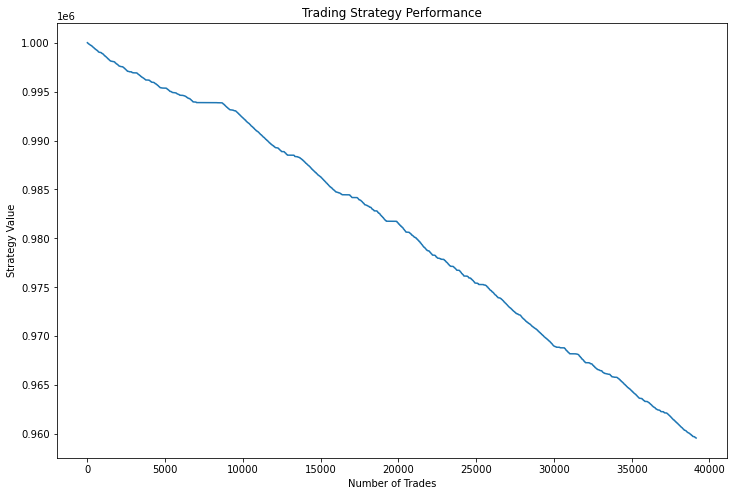

In [66]:
strategy.plot_results(best = True)

In [67]:
strategy.optimize_trade_parameters()

[I 2024-03-10 21:13:54,640] A new study created in memory with name: no-name-38f5a53f-6c01-4ce8-8264-6722143b34a4
[I 2024-03-10 21:14:13,926] Trial 0 finished with value: 943432.1541753595 and parameters: {'stop_loss_pct': 0.9032873203982188, 'take_profit_pct': 1.0912118187896256, 'n_shares': 14}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:14:33,639] Trial 1 finished with value: 793931.418781707 and parameters: {'stop_loss_pct': 0.912708837047398, 'take_profit_pct': 1.0447226539079715, 'n_shares': 51}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:14:56,410] Trial 2 finished with value: 668674.0458843092 and parameters: {'stop_loss_pct': 0.9670260717263196, 'take_profit_pct': 1.041732078827047, 'n_shares': 82}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:15:16,730] Trial 3 finished with value: 741404.1333731299 and parameters: {'stop_loss_pct': 0.9846153514999987, 'take_profit_pct': 1.0185531263496357, 'n_shares': 64}. Best is 

Mejores parámetros encontrados: {'stop_loss_pct': 0.9209330707888167, 'take_profit_pct': 1.029364749288107, 'n_shares': 1}


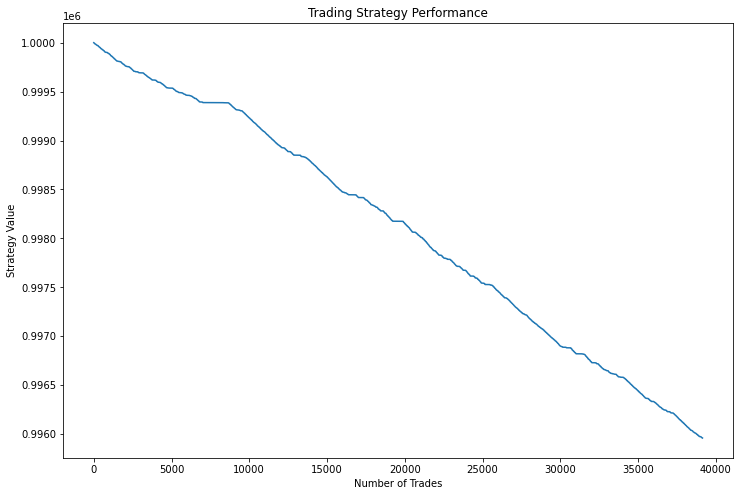

In [68]:
strategy.plot_results(best = True)

### <font color='navy'>  Analysis <font color='black'> 

# Resultados Estrategia
Ejecutando las combinaciones posibles usando Machine Learning, el mejor resultado fue la combinación de indicadores: 

['Logistic', 'SVM']

Con un valor de estrategia de:  **959594.395839**
El valor inicial del fondo era de **100,000** esto indica una perdida de 

**-4.04%**

Tanto la regresión logística SVM son algoritmos de aprendizaje supervisado utilizados principalmente para tareas de clasificación. Estos modelos son útiles cuando se quiere predecir la pertenencia a una clase o categoría, en lugar de predecir un valor continuo como el precio de una acción.

Los parametros que mejor encontramos para nuestros stop loss y take profit fueron:

Mejores parámetros encontrados: {'stop_loss_pct': 0.9209330707888167, 'take_profit_pct': 1.029364749288107, 'n_shares': 1}
Esto nos indica un risk ratio de 1.11 lo cual es bastante equilibrado. 

In [31]:
stop_loss_pct = 0.9209330707888167
take_profit_pct = 1.029364749288107

# Calculamos los valores decimales de stop loss y take profit
stop_loss = 1 - stop_loss_pct
take_profit = 1 + take_profit_pct

# Calculamos la ganancia potencial y la pérdida potencial
potential_gain = take_profit - 1
potential_loss = 1 - stop_loss

# Calculamos el risk ratio
risk_ratio = potential_gain / potential_loss

print("El 'risk ratio' es:", risk_ratio)


El 'risk ratio' es: 1.117741106209178


## Nos encontramos con dos principales problemas. 

1. Limitaciones del modelo: Los modelos de regresión logística y SVM pueden no ser los más adecuados para predecir el rendimiento de acciones, ya que están diseñados principalmente para problemas de clasificación binaria o multiclase. Al aplicarlos a problemas de regresión, como predecir el rendimiento de una acción, es posible que no capturen adecuadamente la complejidad del comportamiento del mercado de valores.

2. Características insuficientes: La regresión logística y SVM requieren características significativas y relevantes para realizar predicciones precisas. Si las características utilizadas para entrenar los modelos no capturan adecuadamente la variabilidad y los factores que influyen en el rendimiento de las acciones, es probable que los modelos generen predicciones inexactas, lo que puede conducir a rendimientos negativos.

# Estrategia Pasiva

In [21]:
data = pd.read_csv('aapl_1d_train.csv')
data = data.dropna()

In [22]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Obtener el precio de cierre del primer y último dato
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Calcular el rendimiento del activo
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre

print("El rendimiento del activo desde el primer cierre hasta el último cierre es: {:.2%}".format(rend_pasivo))


El rendimiento del activo desde el primer cierre hasta el último cierre es: 18.54%


In [24]:
# Comparativa con la estrategia utilizada
cash = 1000000
#strategy.strategy_value[-1] 
cashfinal = 959594.3958
rend_estrategia = (#strategy.strategy_value[-1]
    cashfinal- cash) / cash
print("El rendimiento de la estrategia desde el primer cierre hasta el último cierre es: {:.2%}".format(rend_estrategia))

El rendimiento de la estrategia desde el primer cierre hasta el último cierre es: -4.04%


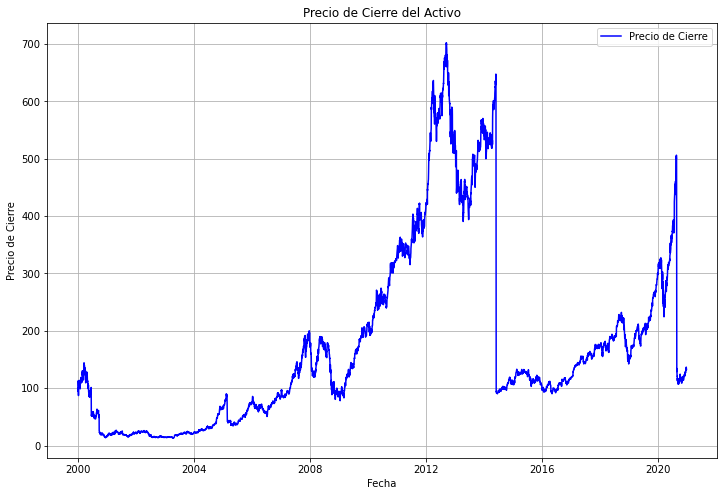

In [27]:
# Ordenar los datos por fecha si no están ordenados
data = data.sort_values(by='Date')
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Close'], label='Precio de Cierre', color='blue')
plt.title('Precio de Cierre del Activo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()

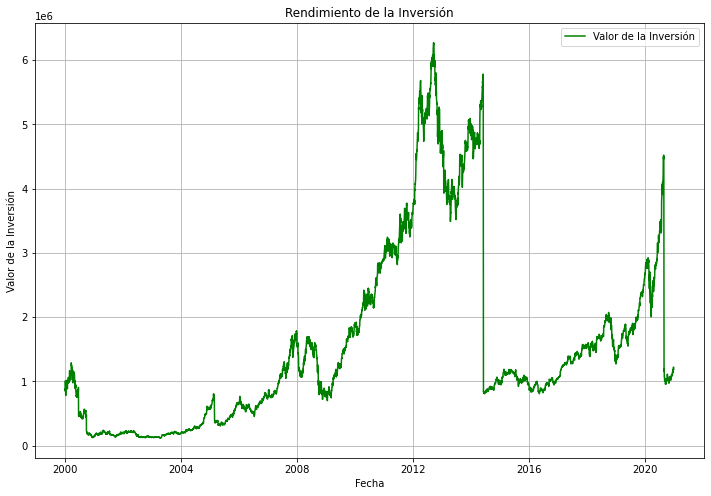

In [29]:
# Calcular el rendimiento acumulado
data['Returns'] = data['Close'].pct_change().fillna(0)

# Calcular el valor acumulado
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Investment_Value'], label='Valor de la Inversión', color='green')
plt.title('Rendimiento de la Inversión')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Inversión')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
valor_final = data['Investment_Value'].iloc[-1]
print("El valor final de la inversión: ${:,.2f}".format(valor_final))

El valor final de la inversión: $1,185,443.41


# Estrategia Pasiva vs Estrategia Machine Learning


In [33]:
print("El rendimiento del activo desde el primer cierre hasta el último cierre es: {:.2%}".format(rend_pasivo))

El rendimiento del activo desde el primer cierre hasta el último cierre es: 18.54%


In [34]:
print("El rendimiento de la estrategia desde el primer cierre hasta el último cierre es: {:.2%}".format(rend_estrategia))

El rendimiento de la estrategia desde el primer cierre hasta el último cierre es: -4.04%


In [36]:
pasivavsestr = rend_pasivo - rend_estrategia
print("Diferencia entre la estrategia pasiva y la estrategia con machine learning es: {:.2%}".format(pasivavsestr))

Diferencia entre la estrategia pasiva y la estrategia con machine learning es: 22.58%


# Conclusiones 

Las limitaciones de los modelos de regresión logística y SVM radican en su incapacidad para capturar relaciones complejas y no lineales entre las variables de entrada y la salida, así como en su sensibilidad a la calidad y cantidad de datos de entrenamiento, lo que puede afectar su capacidad para generalizar adecuadamente a datos nuevos y no vistos.

Es posible aplicar modelos de regresión logística y SVM para predecir el rendimiento de acciones como AAPL, pero es importante tener en cuenta las limitaciones y los desafíos asociados con estos modelos. Ya que es posible que se obtengan rendimientos negativos a lo largo del tiempo debido a la complejidad y la volatilidad inherentes del mercado de valores, así como a las limitaciones de los propios modelos.

Aunque la estrategia basada en machine learning puede ofrecer oportunidades para mejorar el rendimiento y optimizar la toma de decisiones en la inversión, los resultados de esta comparación subrayan la necesidad de un análisis crítico y una comprensión profunda del mercado y de los modelos utilizados. Es esencial considerar no solo el potencial de ganancias, sino también la capacidad de mitigar riesgos y adaptarse a la volatilidad del mercado. La combinación de enfoques pasivos y algorítmicos puede ofrecer un equilibrio que aproveche las fortalezas de cada enfoque y conduzca a resultados más consistentes y satisfactorios a largo plazo.

